# HW3: تشخیص اعداد دست نویس با استفاده از شبکه‌های عصبی پیچشی (CNN)
Welcome to Homework 3  &#128522;&#9996;

In [1]:

import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

2021-12-14 00:12:28.071242: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [3]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


 <div dir='rtl'style="text-align: right;font-family:verdana;">
 
## A) دسته‌بندی به کمک شبکه‌های عصبی پیچشی

In [4]:
# Define the CNN model
def my_cnn_model():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(25,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation='softmax'),
    ])

my_model = my_cnn_model()
my_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

2021-12-14 00:12:32.115299: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-14 00:12:32.119484: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-14 00:12:32.175911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 00:12:32.176294: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX230 computeCapability: 6.1
coreClock: 1.531GHz coreCount: 2 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 52.21GiB/s
2021-12-14 00:12:32.176337: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-12-14 00:12:32.187775: I tensorflow/stream_executor/platform/default/dso_lo

2021-12-14 00:12:32.281238: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-12-14 00:12:32.474755: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-14 00:12:32.495625: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4812 - accuracy: 0.8538
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0763 - accuracy: 0.9767
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0514 - accuracy: 0.9840
Epoch 4/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0397 - accuracy: 0.9871
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0371 - accuracy: 0.9875
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0291 - accuracy: 0.9910
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 8/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0220 - accuracy: 0.9928
Epoch 9/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0195 - accuracy: 0.9941
Epoch 10/20
1875/1875 [==============================] - 15s 8ms/step - l

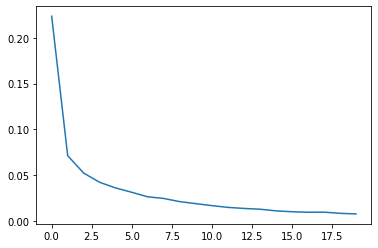

In [5]:
# Train and test the CNN model
train_labels_probs = tf.keras.utils.to_categorical(train_labels)
h = my_model.fit(train_images, train_labels_probs, epochs=20)

plt.plot(h.history['loss'])

In [6]:
#  Use the evaluate method to test the model
test_labels_probs = tf.keras.utils.to_categorical(test_labels)
ans = my_model.evaluate(test_images, test_labels_probs)
print(f'loss: {ans[0]}, acc: {ans[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0497 - accuracy: 0.9881
loss: 0.04966643825173378, acc: 0.988099992275238


In [7]:
#  Make predictions with the CNN model
mispredicts = []

for i, predicted in enumerate(my_model.predict(test_images)):
    if (tf.argmax(test_labels_probs[i]) != tf.argmax(predicted)):
        mispredicts.append((tf.argmax(predicted), test_images[i]))


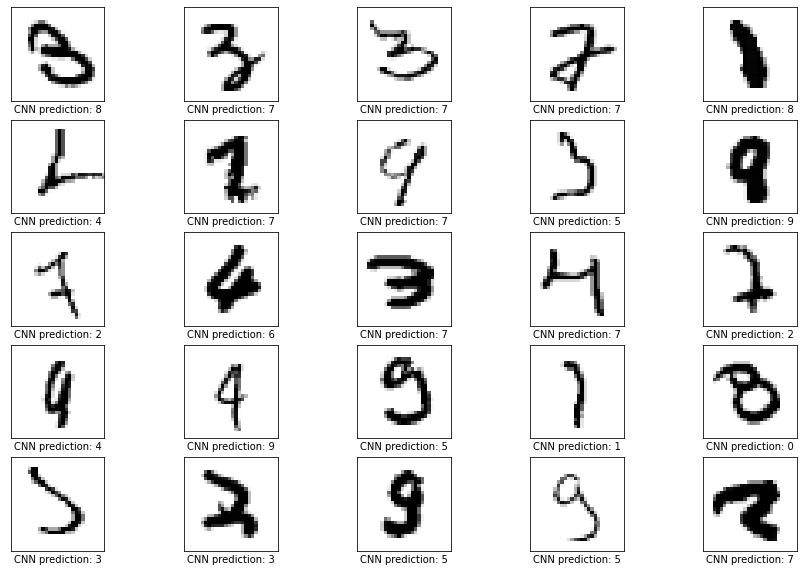

In [8]:
plt.figure(figsize=(15,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(mispredicts[i][1]), cmap=plt.cm.binary)
    plt.xlabel(f'CNN prediction: {mispredicts[i][0]}')

همانطور که مشاهده میکنیم اکثر تصاویری که بصورت خطا تشخیص داده شده خود خود تصاویر اکثرا مبهم هستند و یا شبیه به عدد دیگری هستند و حتی با چشم انسان هم اشتباه تشخیص داده می‌شوند که مدل ما هم به اشتباه تشخیص داده است.

Answer 7
My prediction 7
confident:
0: 0.000
1: 0.000
2: 0.000
3: 0.000
4: 0.000
5: 0.000
6: 0.000
7: 100.000
8: 0.000
9: 0.000


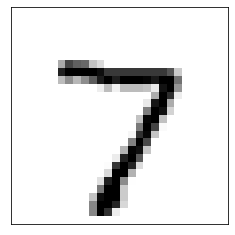

In [9]:
# Please identify the digit with the highest confidence prediction for the first image in the test dataset

plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(test_images[0]), cmap=plt.cm.binary)
print(f"Answer {test_labels[0]}")
print(f"My prediction {tf.argmax(my_model.predict(test_images)[0])}")
print(f"confident:")
for i,p in enumerate(my_model.predict(test_images)[0]):
    print(f"{i}: {p*100:.3f}")

مدل درست تشخیص داده است و صد درصد هم از مطمئن بوده است.

<div dir='rtl'style="text-align: right;font-family:verdana;">

# سوالات کتبی

    
## سوال اول

بهترین دقت در داده های ترین برابر با 0.9978 است و در داد‌های تست هم برابر با 0.98 بوده است
    
   
## سوال دوم
    
    بله نسبت به مدل قبلی بهتر شده است که و همانطور که میدانیم شبکه های CNN
    برای تصاویر بهتر عمل میکنند به دلایلی همچون امکان اشتراک گذاری پارامتر ها که یک فیلتر را باعث میشود بقیه هم از آن استفاده کنند
    و همچنین این مدل شبکه ها را با تعداد پارامتر کمتر شبکه ی عمیق تری داشته باشیم.
    
## سوال سوم



2021-12-14 00:51:01.722201: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-12-14 00:54:30.332446: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


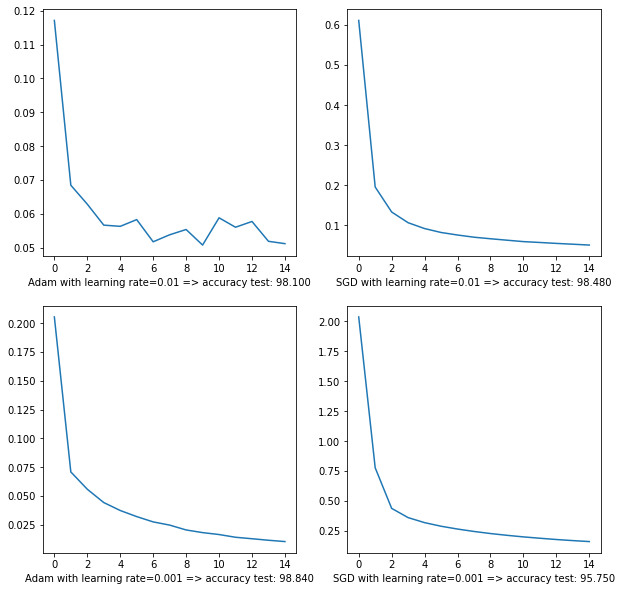

In [11]:
plt.figure(figsize=(10,10))

learning_rates = [0.01, 0.001]

models = []

for i,l in enumerate(learning_rates):
    ##### Adam optimizer
    
    # Testing Learning rates
    models.append(my_cnn_model())
    models[-1].compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=l),metrics=['accuracy'])
    
    # Train the new model
    h = models[-1].fit(train_images,train_labels_probs,epochs=15,verbose=0)
    
    # Test the new model
    test = models[-1].evaluate(test_images, test_labels_probs,verbose=0)
    
    plt.subplot(len(learning_rates),2,2*i+1)
    plt.plot(h.history['loss'])
    plt.xlabel(f'Adam with learning rate={l} => accuracy test: {test[1]*100:.3f}')
    
    
    ##### SGD optimizer
    models.append(my_cnn_model())
    models[-1].compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=l),metrics=['accuracy'])
    # Train the new model
    h = models[-1].fit(train_images,train_labels_probs,epochs=15,verbose=0)
    
    # Test the new model
    test = models[-1].evaluate(test_images, test_labels_probs,verbose=0)
    
    plt.subplot(len(learning_rates),2,2*i+2)
    plt.plot(h.history['loss'])
    plt.xlabel(f'SGD with learning rate={l} => accuracy test: {test[1]*100:.3f}')



همانطور که حدس میزدیم آدام بهتر از استوکستیک گرادیان عمل کرده است در هنگامی که لرنینگ ریت مقدار کمتری داشته و در حالتی که لرنینگ ریت برابر با ۰.۰۱ بوده است ادام تعداد ایپاک های آن کم بوده است و همگرایی کامل رخ نداده است به همین علت است که دقت آن کمتر از استوکستیک است.
اما در حالتی که یک هزارم است لرنینگ ریت کوچیکتر است آدام توانسته به دقت بیشتری دست پیدا کند و سریع تر همگرا شده است.